In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
!pip install plotly

     |████████████████████████████████| 15.3 MB 9.4 MB/s eta 0:00:01


In [4]:
%matplotlib inline

In [8]:
!wget https://raw.githubusercontent.com/HadleyUIUC/FA22-IS445-FinalProject/main/query.csv?token=GHSAT0AAAAAABYFCNAP7YQCN55NVHSPLTD4Y4H5IKQ

--2022-11-30 23:40:19--  https://raw.githubusercontent.com/HadleyUIUC/FA22-IS445-FinalProject/main/query.csv?token=GHSAT0AAAAAABYFCNAP7YQCN55NVHSPLTD4Y4H5IKQ
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44587 (44K) [text/plain]
Saving to: ‘query.csv?token=GHSAT0AAAAAABYFCNAP7YQCN55NVHSPLTD4Y4H5IKQ’

query.csv?token=GHS 100%[===================>]  43.54K  --.-KB/s    in 0.004s  

2022-11-30 23:40:19 (10.6 MB/s) - ‘query.csv?token=GHSAT0AAAAAABYFCNAP7YQCN55NVHSPLTD4Y4H5IKQ’ saved [44587/44587]



In [26]:
usgs = pd.read_csv("query.csv", parse_dates=['time'])

In [192]:
#Adding a new column to the dataframe 1 which records just the date of the observation
usgs['date'] = usgs['time'].dt.date

In [193]:
#Filtering date after 22nd Nov for the visualization by creating a new dataframe (2)
usgs_1 = usgs[usgs['date'] >= pd.Timestamp('2022-11-22')]
#Parsing the dataframe 2's date
usgs_1['date'] = pd.to_datetime(usgs['date'])

<ipython-input-193-60ca949e52e1>:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  usgs_1 = usgs[usgs['date'] >= pd.Timestamp('2022-11-22')]
<ipython-input-193-60ca949e52e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usgs_1['date'] = pd.to_datetime(usgs['date'])


In [194]:
#Extracting the day information and adding a new column 
usgs_1['day_no'] = usgs_1['date'].dt.day

<ipython-input-194-2f54c8fd281c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usgs_1['day_no'] = usgs_1['date'].dt.day


In [196]:
usgs_1

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,day,date,day_no
0,2022-11-28 22:45:17.428000+00:00,38.879400,-97.429000,5.000000,2.60,mb_lg,20,125.00,0.676000,0.2800,...,2.870000,2.002000,0.096,28,reviewed,us,us,2022-11-28,2022-11-28,28
1,2022-11-28 18:59:23.630000+00:00,31.554393,-104.137108,6.645728,3.50,ml,28,94.00,0.063942,0.2000,...,0.951248,0.852576,0.200,28,reviewed,tx,tx,2022-11-28,2022-11-28,28
2,2022-11-28 02:33:36.759000+00:00,35.282833,-98.017167,6.750000,2.90,ml,96,25.00,0.000000,0.2500,...,NaN,0.400000,0.220,42,reviewed,ok,ok,2022-11-28,2022-11-28,28
3,2022-11-28 01:54:59.726000+00:00,31.609284,-103.963692,8.856616,2.50,ml,21,51.00,0.092476,0.1000,...,0.631880,1.173838,0.200,30,reviewed,tx,tx,2022-11-28,2022-11-28,28
4,2022-11-27 11:49:45.090000+00:00,33.160833,-116.019333,3.290000,2.63,ml,77,27.00,0.037100,0.1900,...,0.140000,0.350000,0.080,24,reviewed,ci,ci,2022-11-27,2022-11-27,27
5,2022-11-27 04:21:04.350000+00:00,31.682165,-104.389318,6.080151,2.60,ml,41,65.00,0.031239,0.2000,...,0.775632,0.747616,0.100,26,reviewed,tx,tx,2022-11-27,2022-11-27,27
6,2022-11-27 04:00:15.650000+00:00,40.354333,-124.565333,25.420000,2.66,md,31,235.00,0.182600,0.1700,...,0.710000,0.880000,0.202,36,reviewed,nc,nc,2022-11-27,2022-11-27,27
7,2022-11-26 16:07:26.095000+00:00,31.686663,-104.404433,6.028735,3.10,ml,27,53.00,0.038532,0.2000,...,0.732438,0.660641,0.100,15,reviewed,tx,tx,2022-11-26,2022-11-26,26
8,2022-11-26 14:37:19.088000+00:00,37.993200,-118.234100,4.000000,2.60,ml,25,57.38,0.261000,0.1288,...,NaN,1.400000,0.360,10,reviewed,nn,nn,2022-11-26,2022-11-26,26
9,2022-11-26 07:34:42.900000+00:00,35.586167,-116.909500,1.990000,2.52,ml,24,83.00,0.161400,0.1400,...,0.190000,0.830000,0.162,92,reviewed,ci,ci,2022-11-26,2022-11-26,26


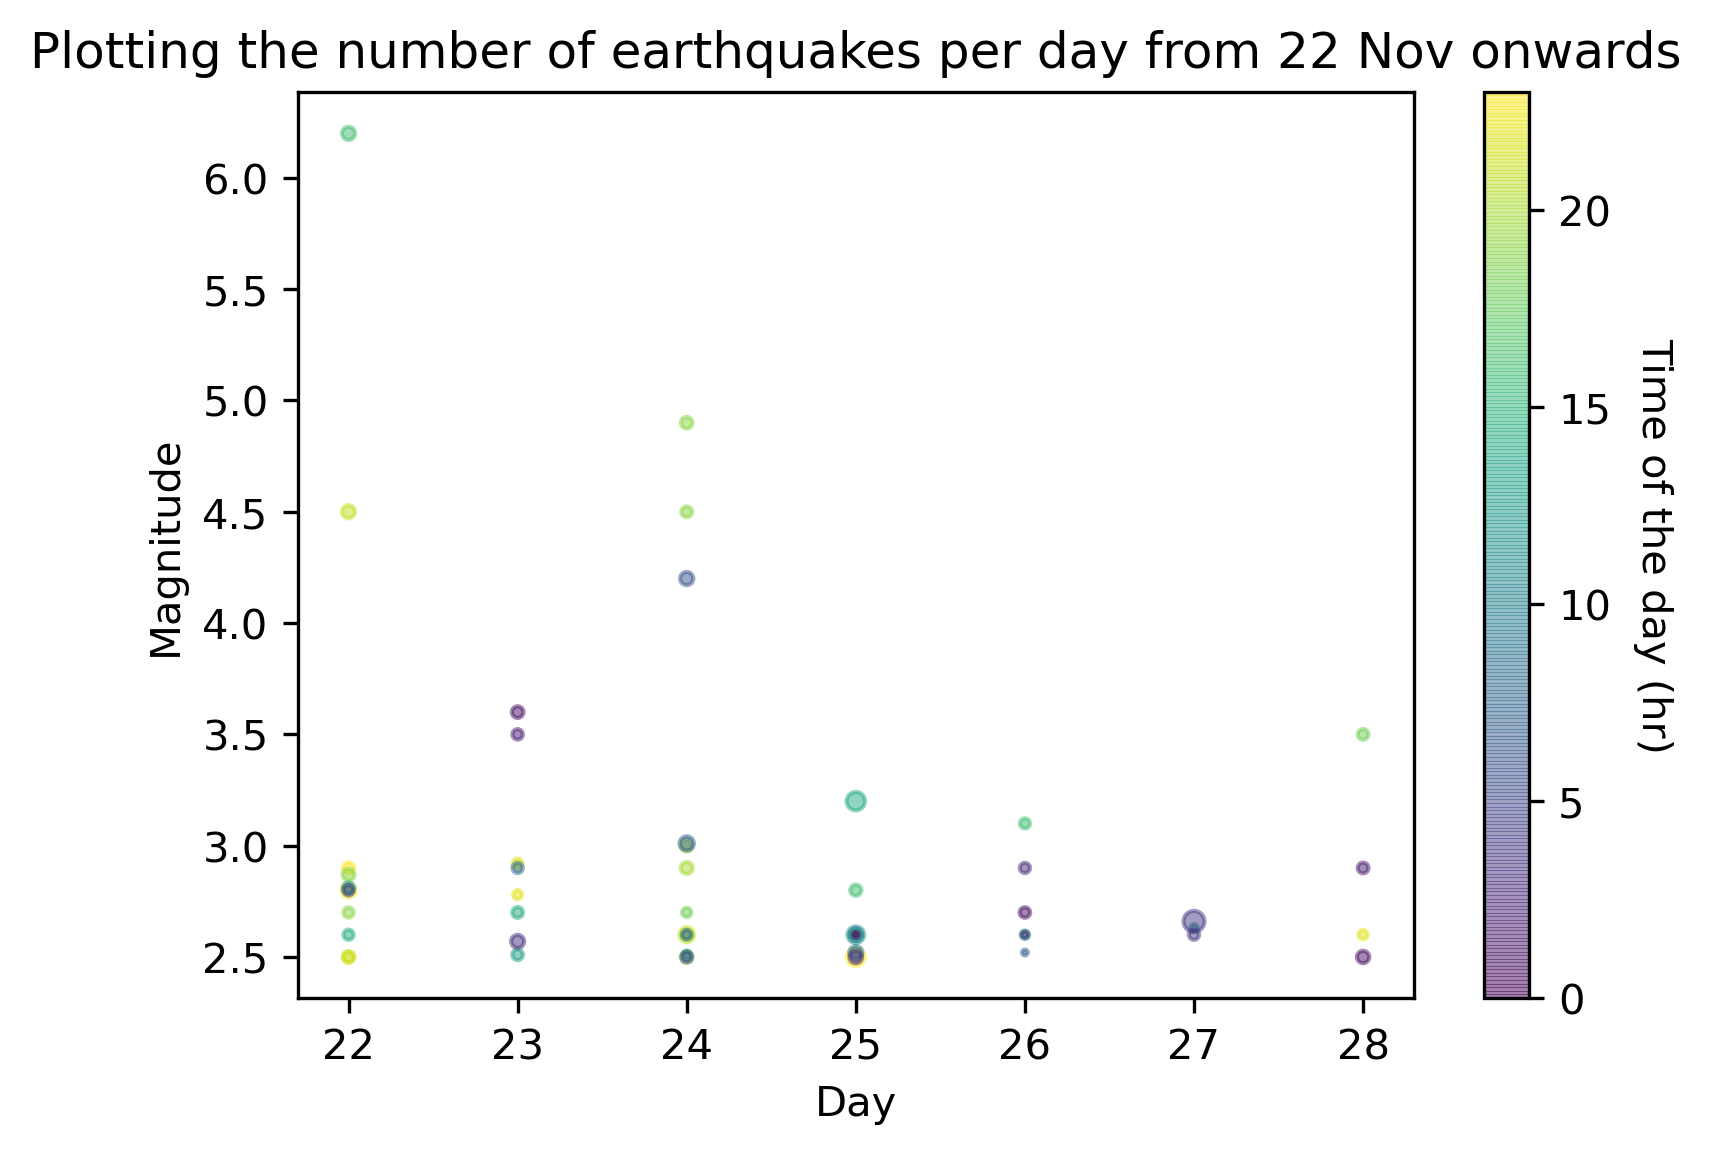

In [209]:
#Plot to visualize the pattern of earthquakes from 22nd Nov
#Plotted against magnitude
#the size of scatter points changes as per the depth of the earthquake
#The color shows the time of the day when the earthquake was recorded.
fig, ax = plt.subplots(dpi = 300)
c = ax.scatter(usgs_1['day_no'], usgs_1['mag'], 
               c = usgs_1['time'].dt.hour, 
               s = usgs_1['depth'].values, 
              alpha = 0.5)
ax.set_xlabel("Day")
ax.set_ylabel("Magnitude")
ax.set_title("Plotting the number of earthquakes per day from 22 Nov onwards")
cbar = fig.colorbar(c)
cbar.set_label('Time of the day (hr)', rotation=270, labelpad=15)

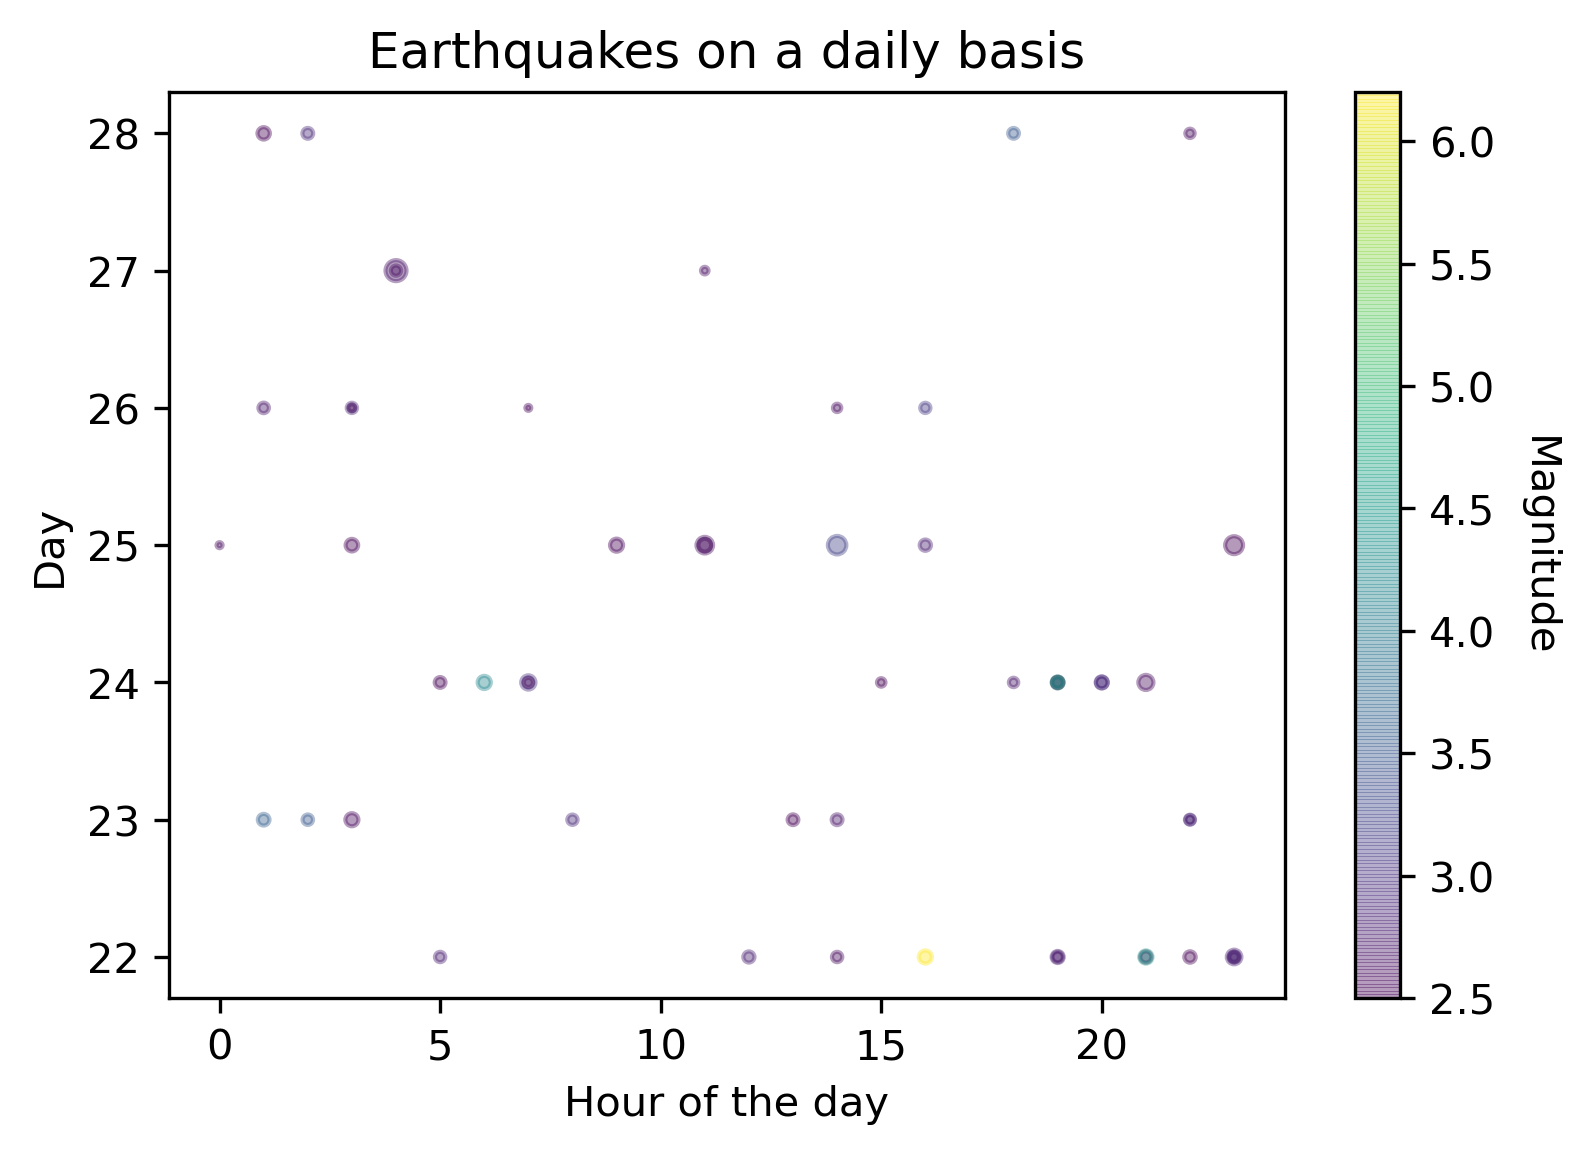

In [212]:
#Plot to visualize the pattern of earthquakes from 22nd Nov
#Plotted showing everyday occurences
#the size of scatter points changes as per the depth of the earthquake
#The color shows the magnitude of the recorded earthquake.
fig, ax = plt.subplots(dpi = 300)
c = ax.scatter(usgs_1['time'].dt.hour,usgs_1['day_no'], 
               c = usgs_1['mag'], s = usgs_1['depth'].values, 
              alpha = 0.4)
ax.set_xlabel("Hour of the day")
ax.set_ylabel("Day")
ax.set_title("Earthquakes on a daily basis")
cbar = fig.colorbar(c)
cbar.set_label('Magnitude', rotation=270, labelpad=15)

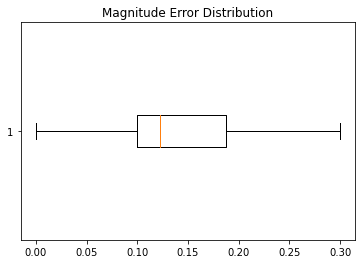

In [228]:
#Boxplot for errors
usgs_1 = usgs_1.dropna(subset=['magError', 'horizontalError','depthError'])
fig, ax = plt.subplots()
ax.boxplot(usgs_1['magError'], vert = False)
plt.title("Magnitude Error Distribution")
plt.show()

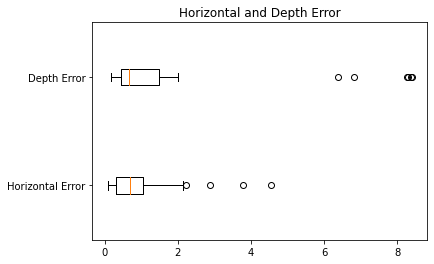

In [227]:
error = [usgs_1['horizontalError'],usgs_1['depthError']]
fig, ax = plt.subplots()
ax.boxplot(error, vert = False)
plt.title("Horizontal and Depth Error")
ax.set_yticklabels(['Horizontal Error','Depth Error'])
plt.show()